
# Task is to analyze the sales of the walmart with the data given (eg - analysis weekly sales, which store or dept sells most etc.)

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


In [2]:
store_df=pd.read_csv("/content/drive/MyDrive/Data Sets/stores.csv")
feature_df=pd.read_csv("/content/drive/MyDrive/Data Sets/features.csv")
test_df=pd.read_csv("/content/drive/MyDrive/Data Sets/test.csv")
train_df=pd.read_csv("/content/drive/MyDrive/Data Sets/train.csv")


In [3]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [10]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [11]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
feature_df.shape

(8190, 12)

In [13]:
feature_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [14]:
feature_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [15]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
store_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


#Combining dfs using inner join


In [18]:
data_fs=feature_df.merge(store_df, how="inner", on="Store")

In [19]:
data_fs.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [20]:
data=data_fs.merge(train_df,how="inner",on=["Date","Store","IsHoliday"])

In [21]:
from datetime import datetime                
data['Date']=pd.to_datetime(data['Date'],errors='coerce')     # we are converting to date data type from object data type

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

#Visualizations

In [23]:
def scatter(df, col):
  
  #Plot the figure

  plt.figure(figsize=(15,8))

  # plot the scatter plot with data from the specified column in x axis  and weekly column in y axis

  plt.scatter(df[col],df['Weekly_Sales'])

  # Give y label as weekly_sales

  plt.ylabel("Walmart_Sales")

  # give x label as colname as we specified as the parameter of the function

  plt.xlabel(col)

  # Give the title of the plot

  plt.title('plot of Weekly sales vs {}'.format(col))


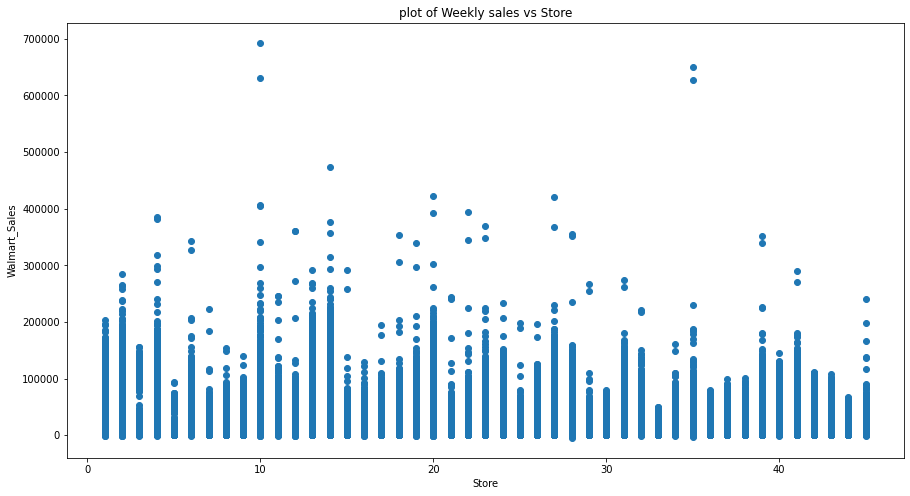

In [24]:
# Plot the sctter plot using scatter function

scatter(data,"Store")

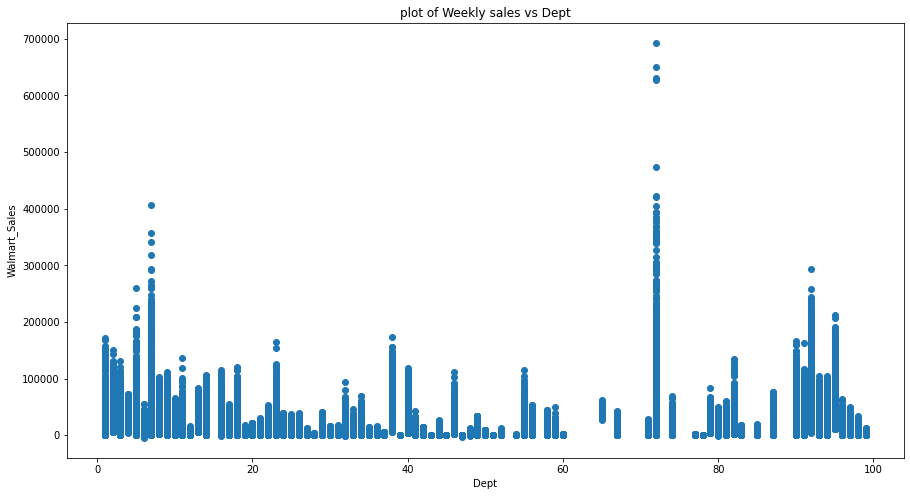

In [25]:
# plotting scatter plot weekly sales and dept wise
scatter(data,"Dept")

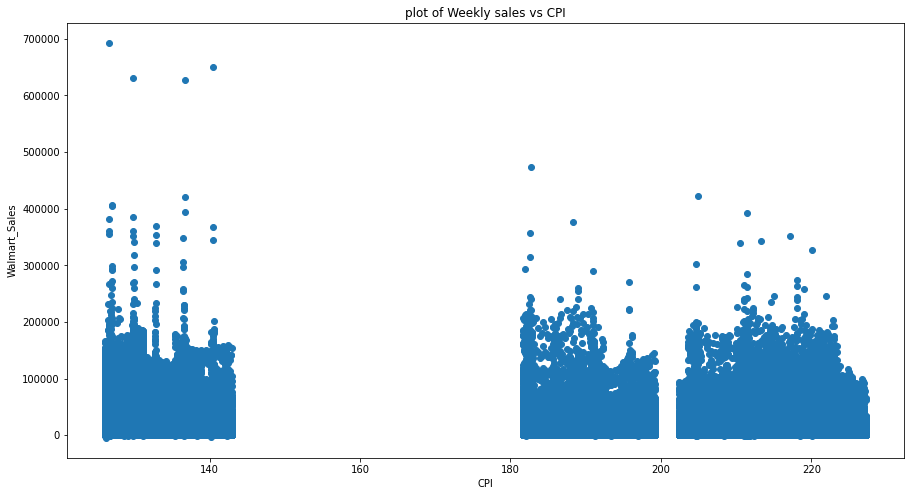

In [26]:
scatter(data,'CPI')

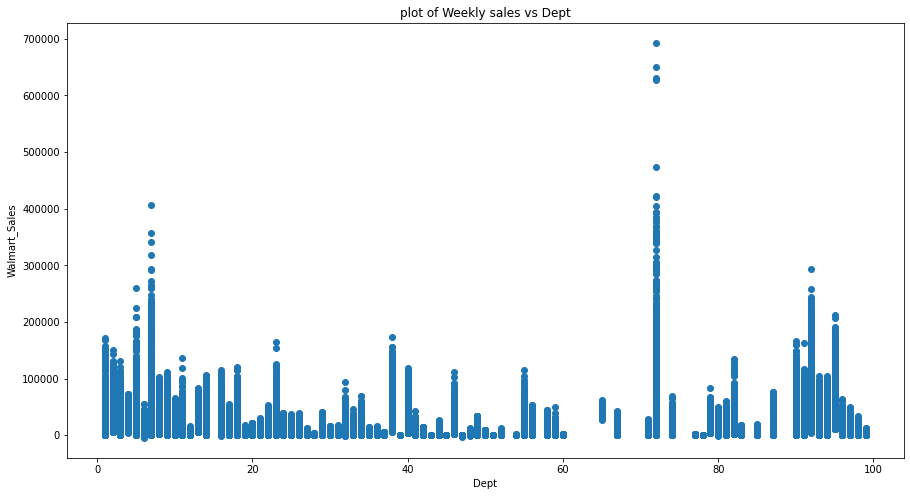

In [27]:
scatter(data,'Dept')

In [28]:
data['Week']=data['Date'].dt.isocalendar().week     # Getting the week and year using isocalendar()
data['Year']=data.Date.dt.isocalendar().year

In [29]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,5,2010
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,5,2010
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,5,2010
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,5,2010
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,5,2010


In [30]:
# Line plots for weekly sales for each year
weekly_sale_2011=data[data['Year']== 2011]

In [31]:
weekly_sale_2011

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,Year
3443,1,2011-01-07,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,False,A,151315,1,15984.24,1,2011
3444,1,2011-01-07,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,False,A,151315,2,43202.29,1,2011
3445,1,2011-01-07,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,False,A,151315,3,15808.15,1,2011
3446,1,2011-01-07,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,False,A,151315,4,37947.80,1,2011
3447,1,2011-01-07,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,False,A,151315,5,22699.69,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418660,45,2011-12-30,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,True,B,118221,93,1426.52,52,2011
418661,45,2011-12-30,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,True,B,118221,94,2979.03,52,2011
418662,45,2011-12-30,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,True,B,118221,95,42084.36,52,2011
418663,45,2011-12-30,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,True,B,118221,97,5569.82,52,2011


In [32]:
weekly_sales_2011=data[data['Year']== 2011]['Weekly_Sales'].groupby(data['Week']).mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly_Sales_2011')

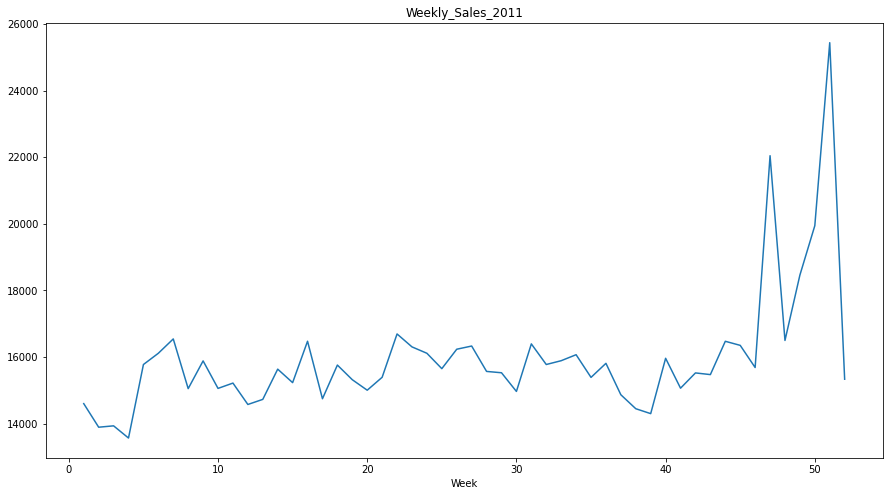

In [41]:
plt.figure(figsize=(15,8))
sb.lineplot(weekly_sales_2011.index,weekly_sales_2011.values)
plt.title("Weekly_Sales_2011")

In [34]:
weekly_sales_2010=data[data['Year']== 2010]['Weekly_Sales'].groupby(data['Week']).mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly_Sales_2010')

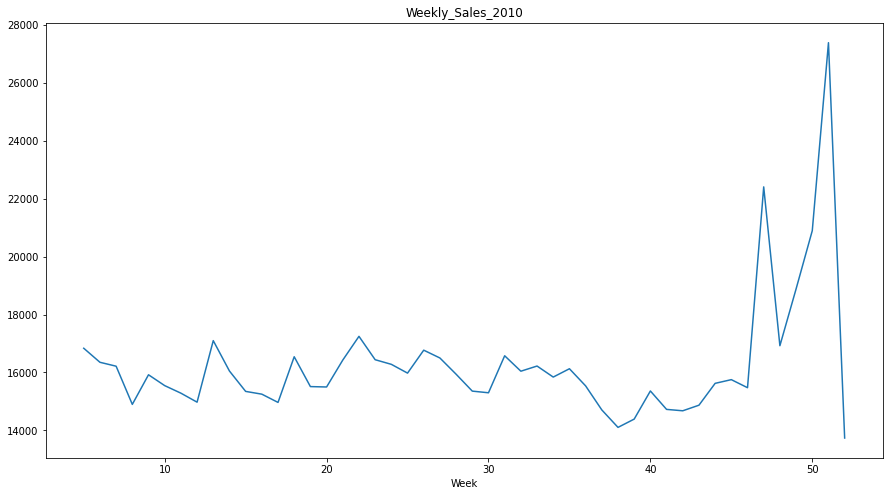

In [42]:
plt.figure(figsize=(15,8))
sb.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)
plt.title("Weekly_Sales_2010")


In [36]:

weekly_sales_2012=data[data['Year']== 2012]['Weekly_Sales'].groupby(data['Week']).mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly_Sales_2012')

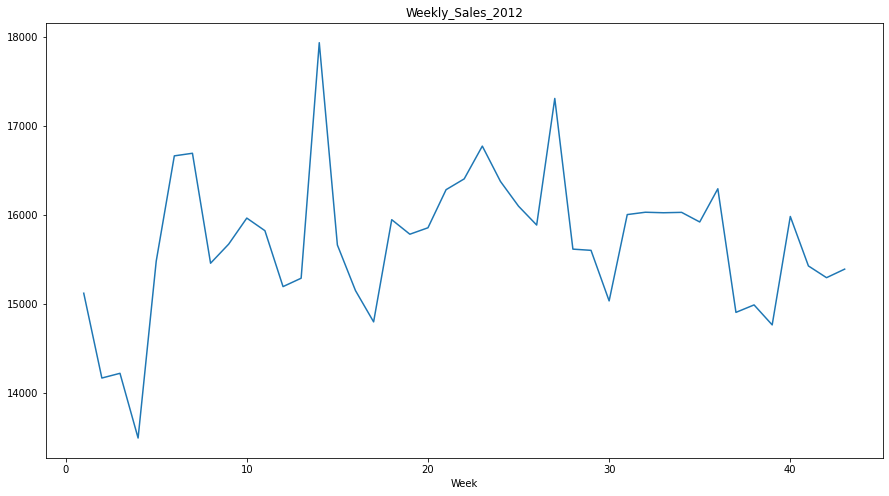

In [43]:
plt.figure(figsize=(15,8))
sb.lineplot(weekly_sales_2012.index,weekly_sales_2012.values)
plt.title("Weekly_Sales_2012")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


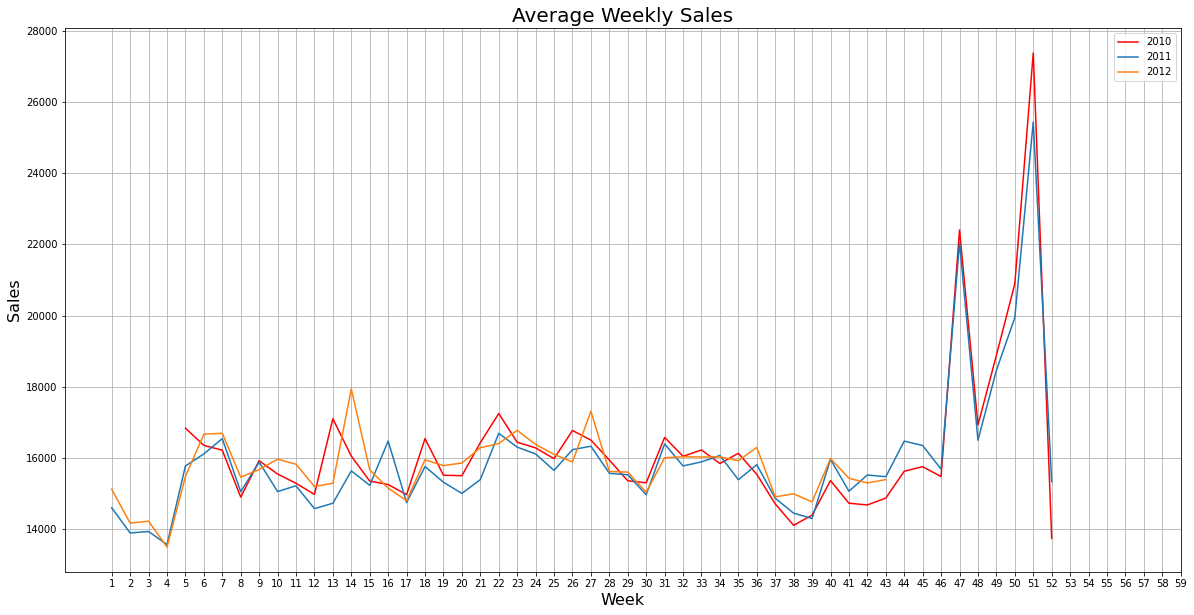

In [52]:
# Plot the weekly sales for years 2010,2011, 2012 on a single plot  to compare the sales with respect to weeks
plt.figure(figsize=(20,10))
sb.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='r')
sb.lineplot(weekly_sales_2011.index,weekly_sales_2011.values)
sb.lineplot(weekly_sales_2012.index,weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60,step=1))
plt.title("Average Weekly Sales",fontsize=20)
plt.xlabel('Week',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.legend(['2010','2011','2012'])  # orderwise we specifiying as we have given to plot above

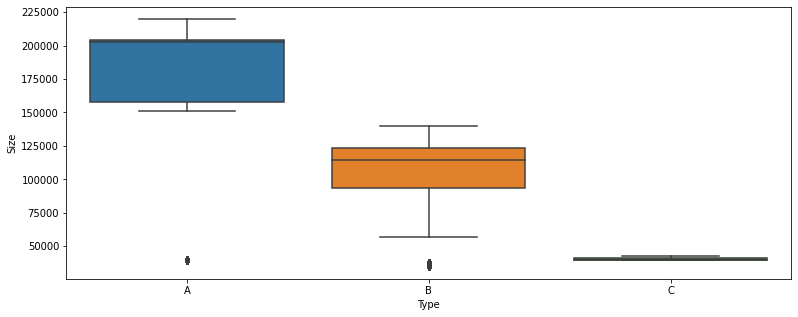

In [55]:
# Box plot
plt.figure(figsize=(13,5))
sb.boxplot(x='Type',y='Size',data=data)

# Which Store   we have maximum mean weekly sales

In [72]:
# we grouping and taking mean()
sales_mean=data['Weekly_Sales'].groupby(data['Store']).mean()

Text(0.5, 1.0, 'Average weekly sales per store')

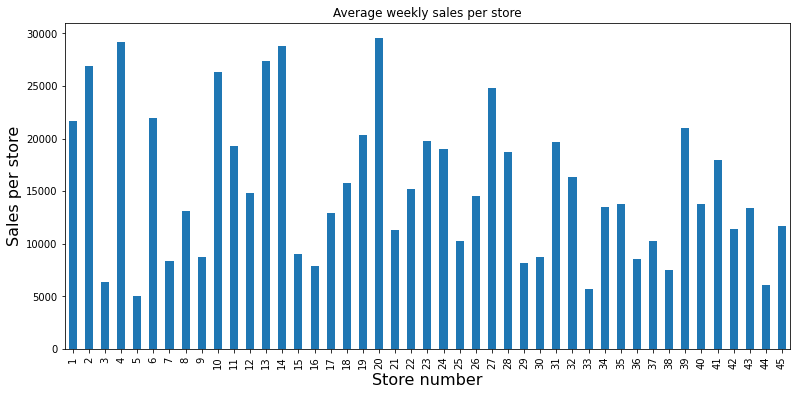

In [78]:
plt.figure(figsize=(13,6))
plt.grid()
sales_mean.plot(kind='bar')
plt.xlabel("Store number",fontsize=16)
plt.ylabel("Sales per store",fontsize=16)
plt.title("Average weekly sales per store")

In [63]:
sales_meandf = pd.DataFrame(sales_mean)

In [64]:
# we can also plot like this
sales_meandf.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=90)

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


#Which Store we have minimum mean weekly sales

In [73]:
sales_meandf.sort_values('Weekly_Sales').style.bar(align='left',width=90)

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


# Which dept has maximum weekly_sale

In [67]:
dept_df=data['Weekly_Sales'].groupby(data['Dept']).mean()

In [68]:
dept_dff=pd.DataFrame(dept_df)

In [69]:
dept_dff.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=90)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


Text(0, 0.5, 'Sales per dept')

<Figure size 1800x864 with 0 Axes>

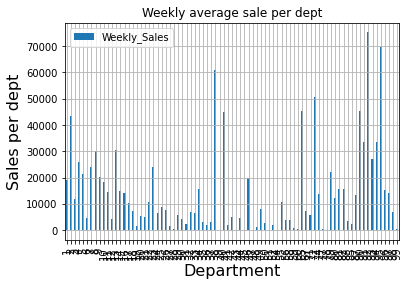

In [80]:
plt.figure(figsize=(25,12))
dept_dff.plot(kind='bar')
plt.grid()
plt.title("Weekly average sale per dept")
plt.xlabel("Department",fontsize=16)
plt.ylabel("Sales per dept",fontsize=16)

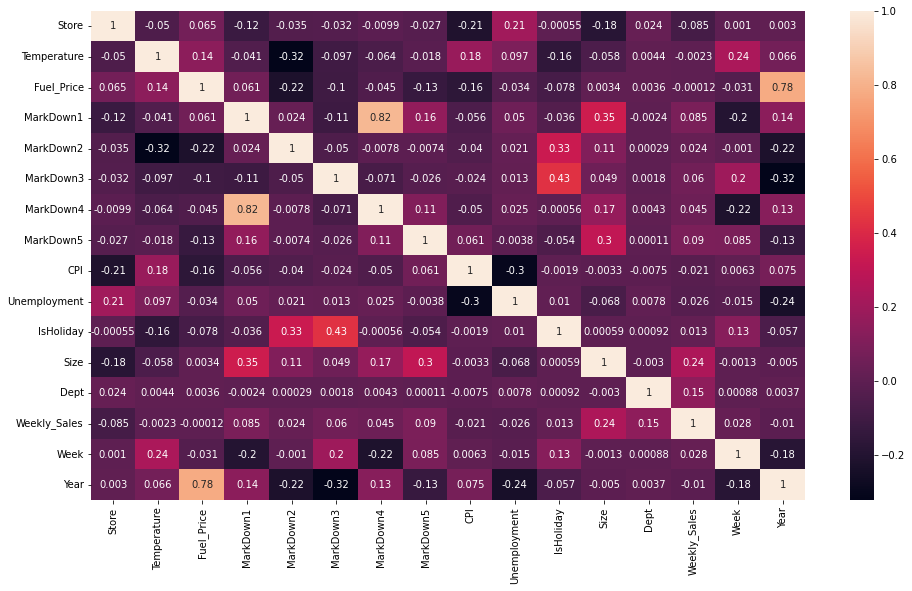

In [84]:
plt.figure(figsize=(16,9))
sb.heatmap(data.corr(),annot=True)

# Conclusions

- > Dept 92 has highest Sale.
- > Dept 47 has lowest sale.
- > Store 20 has highest sale.
- > Store 5 has lowest sale.
- > Type A stores are largest.
- > Type C stores are smallest.
- > All year posesses a sort of pattern.
- > At the end of the year we observed highest sales peak throughout the year.